In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.under_sampling import RandomUnderSampler


import warnings
warnings.filterwarnings('ignore')

# Credit Card Campaign

In [2]:
df= pd.read_excel('creditcardmarketing.xlsx')

In [3]:
df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [4]:
df.isnull().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

#### Here we can see that the only nulls that exist are the ones in Q1 Balance,Q2 Balance,Q3 Balance and Q4 Balance.
#### We can change the nulls for mean values.

#### But first, lets  put all the headers in lower case.

In [5]:
df.columns=df.columns.str.lower()


In [6]:
df['q1 balance'].fillna(df['q1 balance'].mean(), inplace=True)
df['q2 balance'].fillna(df['q2 balance'].mean(), inplace=True)
df['q3 balance'].fillna(df['q3 balance'].mean(), inplace=True)
df['q4 balance'].fillna(df['q4 balance'].mean(), inplace=True)
df['average balance'].fillna(df['average balance'].mean(), inplace=True)

#### Here we change the NaNs for mean values.

In [7]:
df.dtypes

customer number           int64
offer accepted           object
reward                   object
mailer type              object
income level             object
# bank accounts open      int64
overdraft protection     object
credit rating            object
# credit cards held       int64
# homes owned             int64
household size            int64
own your home            object
average balance         float64
q1 balance              float64
q2 balance              float64
q3 balance              float64
q4 balance              float64
dtype: object

In [8]:
df.isnull().sum()

customer number         0
offer accepted          0
reward                  0
mailer type             0
income level            0
# bank accounts open    0
overdraft protection    0
credit rating           0
# credit cards held     0
# homes owned           0
household size          0
own your home           0
average balance         0
q1 balance              0
q2 balance              0
q3 balance              0
q4 balance              0
dtype: int64

#### All the data point have their correct dtypes, all the headers are lower case, and all the nuls are dealt with, with the mean applied to them. The Data Cleaning is done. 
#### Lets move on to the Exploratory Data Analysis.

# EDA

#### Lets first of all drop the "customer number" column, since it has no importance at all to our EDA.

In [9]:
df.drop('customer number', axis=1, inplace=True)

#### Let's separate the numerical from the categorical columns:

In [10]:
numerical_columns = df.select_dtypes("number")
categorical_columns = df.select_dtypes("object")

#### Lets take a look at the Numerical Values:

In [11]:
numerical_columns

,# bank accounts open,# credit cards held,# homes owned,household size,average balance,q1 balance,q2 balance,q3 balance,q4 balance
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...
17995,1,1,1,5,167.50,136.0,65.0,71.0,398.0
17996,1,3,1,3,850.50,984.0,940.0,943.0,535.0
17997,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0
17998,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0


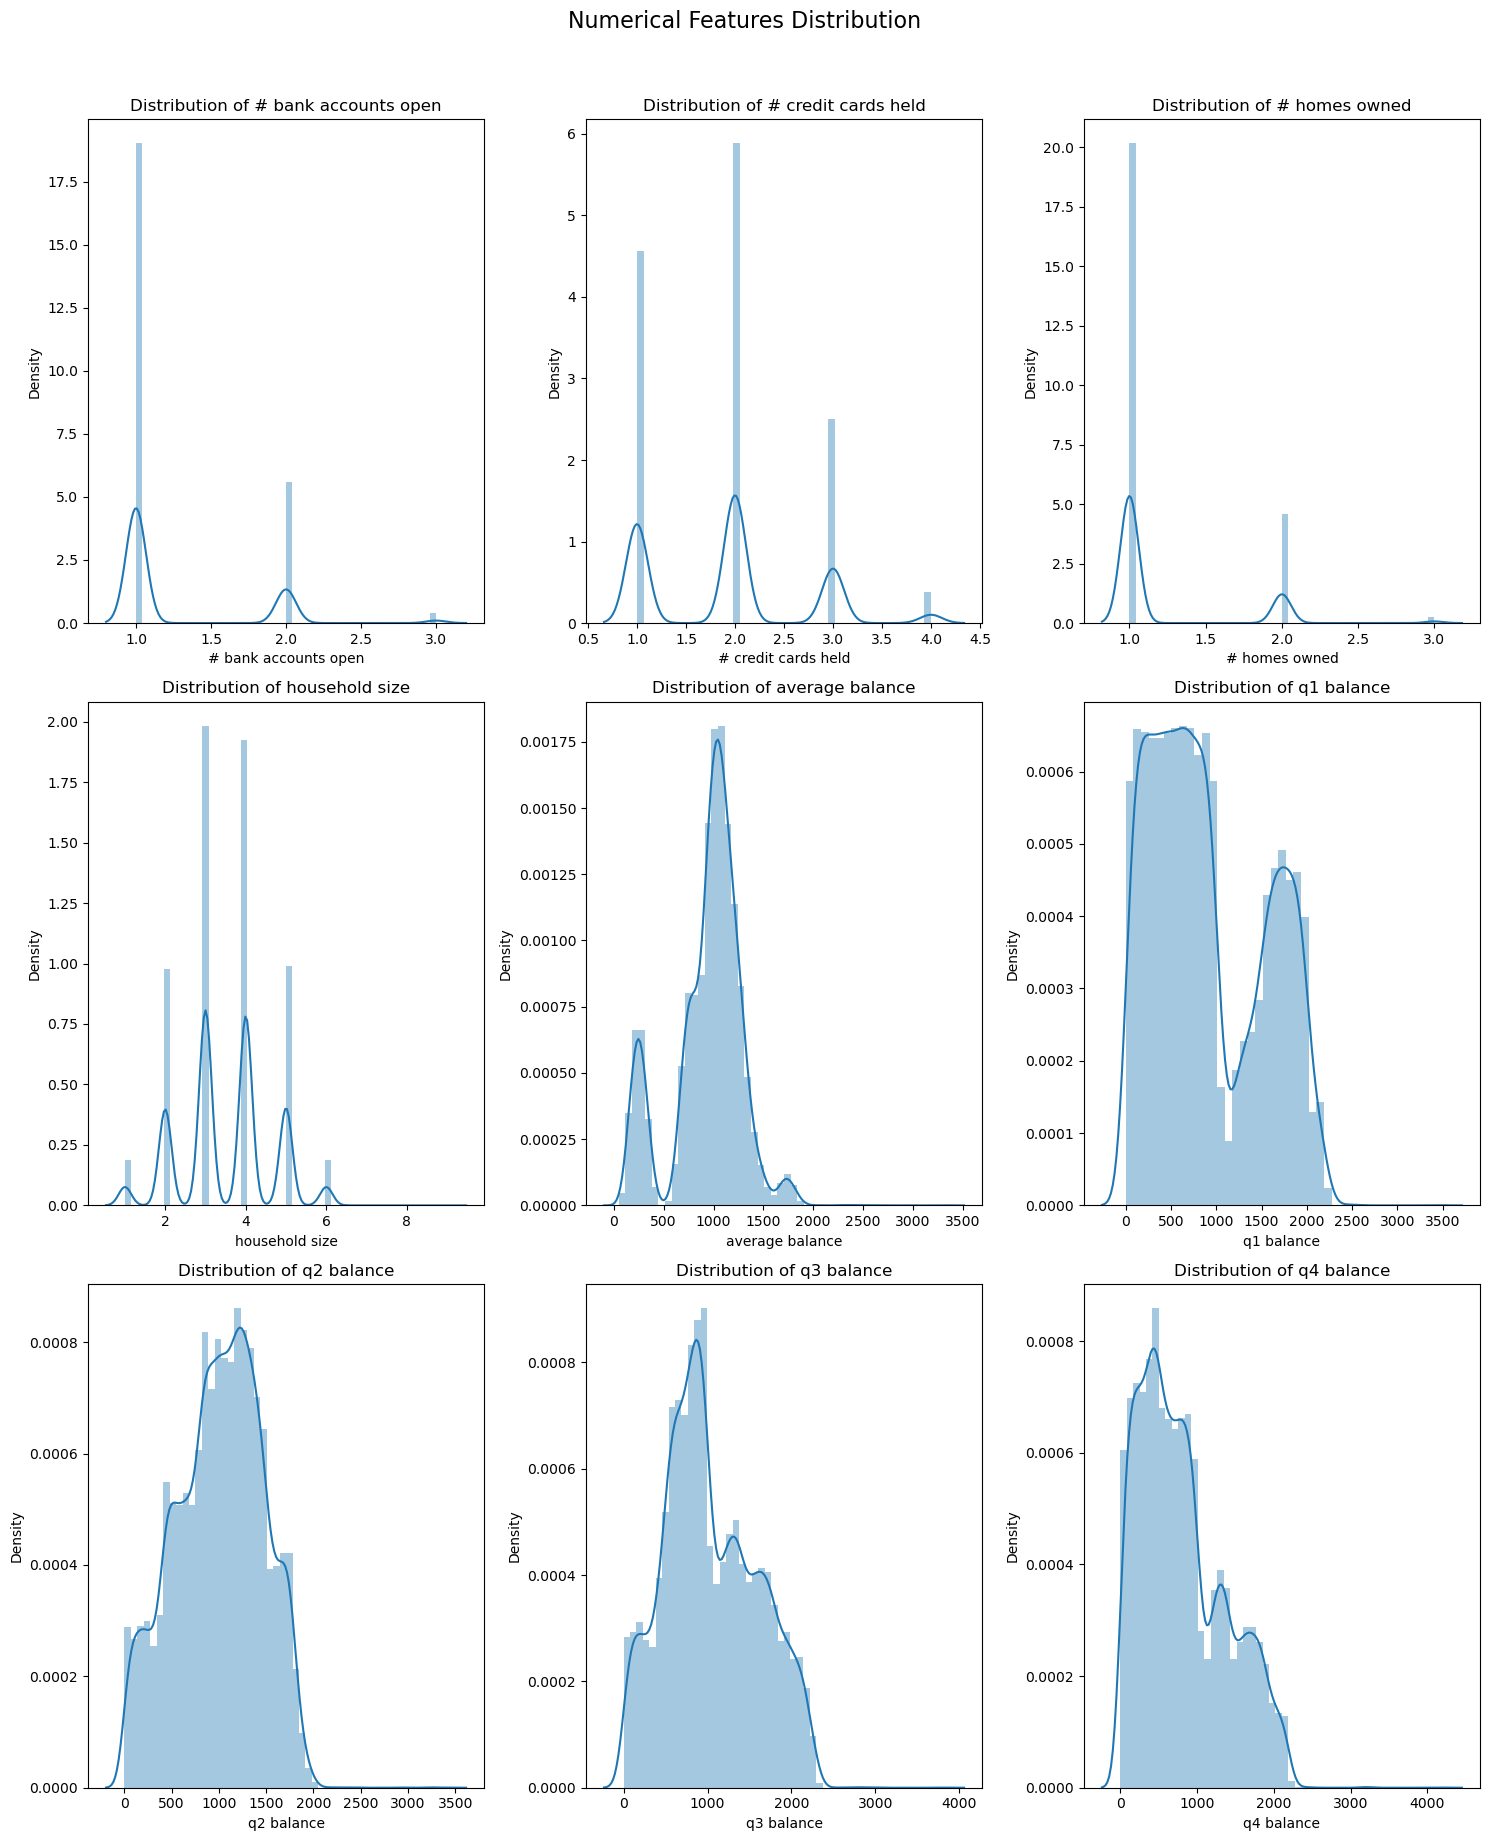

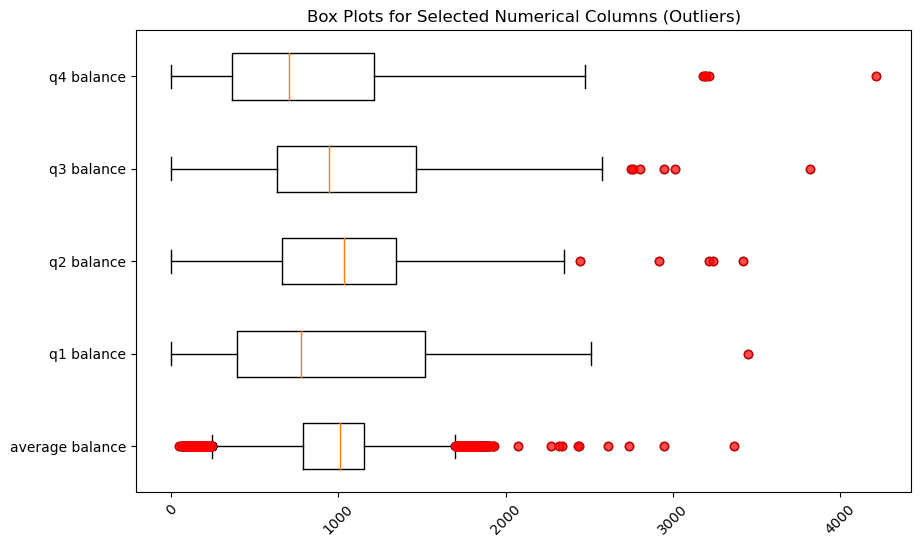

,count,mean,std,min,25%,50%,75%,max
# bank accounts open,18000.0,1.255778,0.472501,1.00,1.0000,1.0,1.0000,3.00
# credit cards held,18000.0,1.903500,0.797009,1.00,1.0000,2.0,2.0000,4.00
# homes owned,18000.0,1.203444,0.427341,1.00,1.0000,1.0,1.0000,3.00
household size,18000.0,3.499056,1.114182,1.00,3.0000,3.0,4.0000,9.00
average balance,18000.0,940.515562,350.064214,48.25,787.9375,1006.5,1152.5625,3366.25
q1 balance,18000.0,910.450656,619.663515,0.00,393.0000,773.0,1520.2500,3450.00
q2 balance,18000.0,999.392190,457.097214,0.00,664.0000,1032.0,1342.0000,3421.00
q3 balance,18000.0,1042.033600,553.083487,0.00,633.0000,946.0,1462.0000,3823.00
q4 balance,18000.0,810.185803,558.628553,0.00,363.7500,704.0,1211.0000,4215.00


,count,mean,std,min,25%,50%,75%,max,iqr
# bank accounts open,18000.0,1.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0
# credit cards held,18000.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0,1.0
# homes owned,18000.0,1.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0
household size,18000.0,3.0,1.0,1.0,3.0,3.0,4.0,9.0,1.0
average balance,18000.0,941.0,350.0,48.0,788.0,1006.0,1153.0,3366.0,365.0
q1 balance,18000.0,910.0,620.0,0.0,393.0,773.0,1520.0,3450.0,1127.0
q2 balance,18000.0,999.0,457.0,0.0,664.0,1032.0,1342.0,3421.0,678.0
q3 balance,18000.0,1042.0,553.0,0.0,633.0,946.0,1462.0,3823.0,829.0
q4 balance,18000.0,810.0,559.0,0.0,364.0,704.0,1211.0,4215.0,847.0


In [12]:
numerical_columns_list = numerical_columns.columns
num_plots = len(numerical_columns_list)

num_rows = (num_plots + 2) // 3
num_cols = min(num_plots, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6*num_rows))
fig.suptitle('Numerical Features Distribution', fontsize=16, y=1.02)  # Adjust 'y' to move the title upwards

for i, col in enumerate(numerical_columns_list):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    sns.distplot(numerical_columns[col], ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


    
    
selected_columns = ['average balance', 'q1 balance', 'q2 balance', 'q3 balance', 'q4 balance']

summary = numerical_columns[selected_columns].describe().T
summary['iqr'] = summary['75%'] - summary['25%']
summary = summary.apply(round)


plt.figure(figsize=(10, 6))
plt.title('Box Plots for Selected Numerical Columns (Outliers)')
plt.xticks(rotation=45)
plt.boxplot(numerical_columns[selected_columns].values, labels=selected_columns, vert=False)


for i, col in enumerate(selected_columns):
    q1 = summary.loc[col, '25%']
    q3 = summary.loc[col, '75%']
    iqr_score = summary.loc[col, 'iqr']
    lower_bound = q1 - 1.5 * iqr_score
    upper_bound = q3 + 1.5 * iqr_score
    outliers = (numerical_columns[col] < lower_bound) | (numerical_columns[col] > upper_bound)
    outliers_col = numerical_columns.index[outliers]
    plt.plot(numerical_columns[col][outliers_col], [i + 1] * len(outliers_col), 'ro', alpha=0.7)

plt.show()
summary = numerical_columns.describe().T
display(summary)

summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(round) 
summary

### Some observations taken with the histograms above:
##### -The majority of customers just have 1 bank account.
##### -Most customers have 2 credit cards held.
##### -The majority of customers just have 1 home owned.
##### -The household size  of most customers is 3.
##### -The average account balance (across all accounts over time) is around 1000
##### -OUTLIERS: We can see some skewness in some of the numerical values. 

## Lets take a look at the Categorical Values:

In [13]:
categorical_columns

,offer accepted,reward,mailer type,income level,overdraft protection,credit rating,own your home
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,Medium,No,Medium,Yes
2,No,Air Miles,Postcard,High,No,Medium,Yes
3,No,Air Miles,Letter,Medium,No,High,No
4,No,Air Miles,Letter,Medium,No,Medium,Yes
...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,No,Low,Yes
17996,No,Cash Back,Letter,High,No,Low,Yes
17997,No,Cash Back,Letter,High,No,Low,No
17998,No,Cash Back,Letter,Medium,No,Medium,Yes


### Lets Check our target variable:

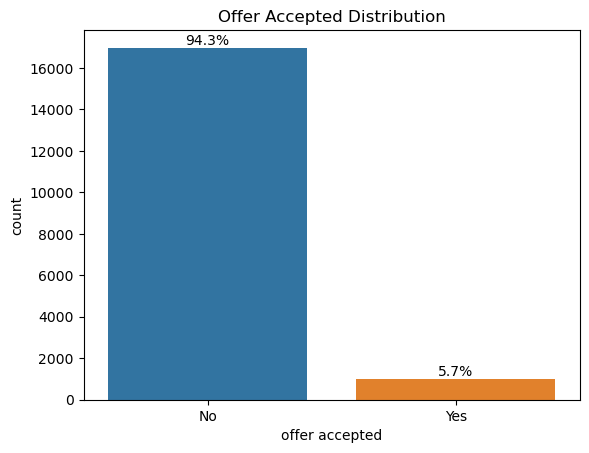

In [14]:
sns.countplot(x='offer accepted', data=df)
plt.title('Offer Accepted Distribution')


total_count = df['offer accepted'].value_counts().sum()
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total_count:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.gca().annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

### Here we can see that only 5.7% of people accepted a credit card offer, while a huge 94.3% doesnt accept any credit card offer. So we can see that we have data imbalance present in this categorical value, that also is our target variable.
### Lets check the other Categorical Values:

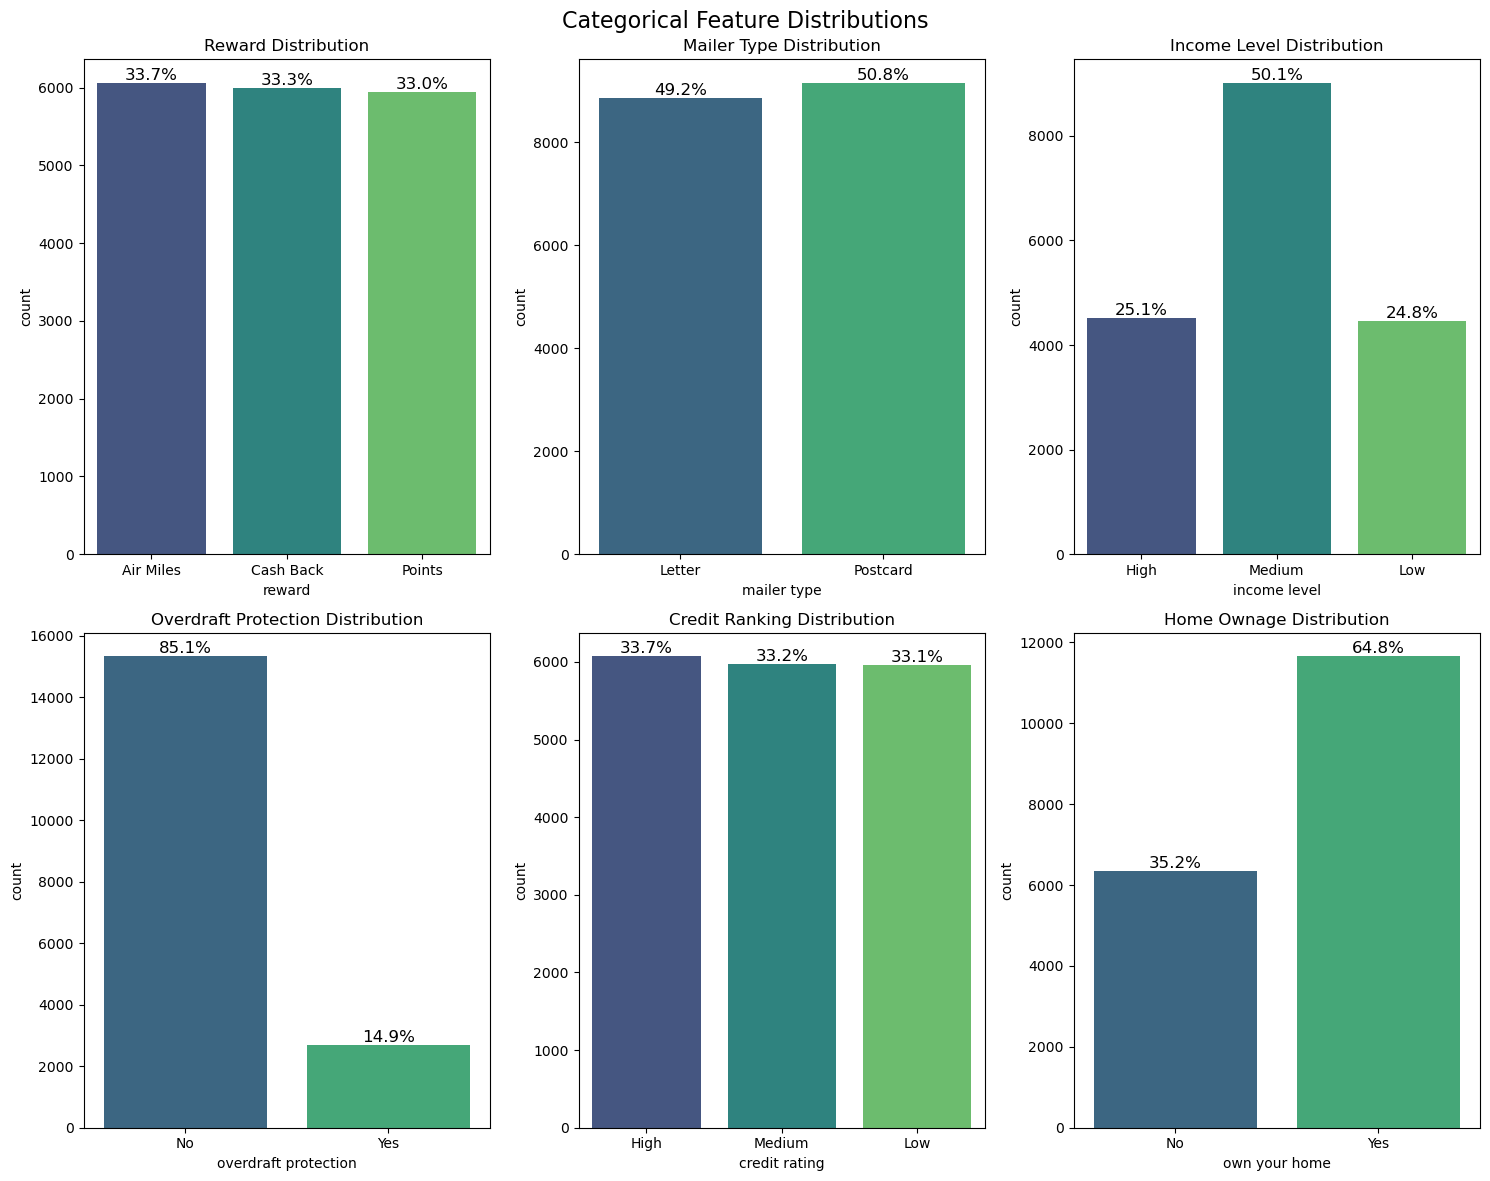

In [15]:
columns_to_plot = ['reward', 'mailer type', 'income level', 'overdraft protection', 'credit rating', 'own your home']
plot_titles = ['Reward Distribution', 'Mailer Type Distribution', 'Income Level Distribution',
               'Overdraft Protection Distribution', 'Credit Ranking Distribution', 'Home Ownage Distribution']


num_subplots = len(columns_to_plot)
num_rows = (num_subplots + 2) // 3
num_cols = min(num_subplots, 3)


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.suptitle('Categorical Feature Distributions', fontsize=16)


for i, col in enumerate(columns_to_plot):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    sns.countplot(x=col, data=df, ax=ax, palette='viridis')  
    ax.set_title(plot_titles[i])

    
    total_count = df[col].value_counts().sum()
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total_count:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)


plt.tight_layout()
plt.show()


### Some conclusions that we can make:


##### - Reward, Mailer Type, and Credit Ranking Distribution are evenly balanced.
##### - Income Level Distribution: Medium Income Level takes 50% of the results, where Low and High Income Level are almost evenly splitted between them. 
##### - Overdraft Protection: An overdraft is like any other loan: The account holder pays interest on it and will typically be charged a one-time insufficient funds fee. Overdraft protection is provided by some banks to customers when their account reaches zero; it avoids insufficient funds charges, but often includes interest and other fees. Just 14.9% of our clients  have Overdraft Protection, while 85.% of our clients dont have  Overdraft Protection.
##### - Home Ownage Distribution - 64.8% of our clients do own an House. 35.2% don't.

# The Machine Learning Model

We are going to test 3 Machine Learning Models for Categorical Values:
- K-Nearest Neighbors 
- Random Forest 
- Gradient Boosting

The KNN Model is a Machine Learning model which uses proximity to make classifications or predictions about the grouping of an individual data point.

The Random Forest Machine Learning Model reduces overfitting by averaging multiple decision trees and is less sensitive to noise and outliers in the data.

The Gradient Boosting  Often provides predictive accuracy that cannot be trumped. Lots of flexibility - can optimize on different loss functions and provides several hyper parameter tuning options that make the function fit very flexible.




But first of all, lets OneHotEncode our Categorical Variables.



### OneHotEncoding

We use OneHotEncoding to convert categorical variables into a numerical format that can be used by machine learning algorithms. OneHotEncoding creates binary columns for each category in the original categorical variable, representing the presence or absence of that category for each data point. This transformation allows machine learning models to understand and utilize categorical data effectively, as most algorithms work with numerical data.

In [16]:
df1 = df.copy()
df1

,offer accepted,reward,mailer type,income level,# bank accounts open,overdraft protection,credit rating,# credit cards held,# homes owned,household size,own your home,average balance,q1 balance,q2 balance,q3 balance,q4 balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [17]:
df1.select_dtypes("object")

,offer accepted,reward,mailer type,income level,overdraft protection,credit rating,own your home
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,Medium,No,Medium,Yes
2,No,Air Miles,Postcard,High,No,Medium,Yes
3,No,Air Miles,Letter,Medium,No,High,No
4,No,Air Miles,Letter,Medium,No,Medium,Yes
...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,No,Low,Yes
17996,No,Cash Back,Letter,High,No,Low,Yes
17997,No,Cash Back,Letter,High,No,Low,No
17998,No,Cash Back,Letter,Medium,No,Medium,Yes


In [18]:
encoder = OneHotEncoder()

In [19]:
encoder.fit(df1[["reward","mailer type", "income level","overdraft protection","credit rating","own your home" ]])

OneHotEncoder()

In [20]:
encoder.transform(df1[["reward","mailer type", "income level","overdraft protection","credit rating","own your home" ]]).todense()

matrix([[1., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 1., 0., 1.],
        [1., 0., 0., ..., 1., 0., 1.],
        ...,
        [0., 1., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 1., 0., 1.],
        [0., 1., 0., ..., 1., 1., 0.]])

In [21]:
encoder.categories_

[array(['Air Miles', 'Cash Back', 'Points'], dtype=object),
 array(['Letter', 'Postcard'], dtype=object),
 array(['High', 'Low', 'Medium'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['High', 'Low', 'Medium'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [22]:
encondercategories=encoder.categories_

In [23]:
cols = list(encoder.categories_)
cols

[array(['Air Miles', 'Cash Back', 'Points'], dtype=object),
 array(['Letter', 'Postcard'], dtype=object),
 array(['High', 'Low', 'Medium'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['High', 'Low', 'Medium'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [24]:
cols1 = []
for category in encondercategories:
    cols1.extend(category)

In [25]:
cols1

['Air Miles',
 'Cash Back',
 'Points',
 'Letter',
 'Postcard',
 'High',
 'Low',
 'Medium',
 'No',
 'Yes',
 'High',
 'Low',
 'Medium',
 'No',
 'Yes']

In [26]:
df1.columns

Index(['offer accepted', 'reward', 'mailer type', 'income level',
       '# bank accounts open', 'overdraft protection', 'credit rating',
       '# credit cards held', '# homes owned', 'household size',
       'own your home', 'average balance', 'q1 balance', 'q2 balance',
       'q3 balance', 'q4 balance'],
      dtype='object')

In [27]:
cols1=[ 'Air Miles',
 'Cash Back',
 'Points',
 'Letter',
 'Postcard',
 'High1',
 'Low1',
 'Medium1',
 'No2',
 'Yes2',
 'High2',
 'Low2',
 'Medium2',
 'No3',
 'Yes3']

In [28]:
df1[cols1] = encoder.transform(df1[["reward","mailer type", "income level","overdraft protection","credit rating","own your home" ]]).todense()

In [29]:
df1

,offer accepted,reward,mailer type,income level,# bank accounts open,overdraft protection,credit rating,# credit cards held,# homes owned,household size,...,High1,Low1,Medium1,No2,Yes2,High2,Low2,Medium2,No3,Yes3
0,No,Air Miles,Letter,High,1,No,High,2,1,4,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,No,Low,1,1,5,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
17996,No,Cash Back,Letter,High,1,No,Low,3,1,3,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
17997,No,Cash Back,Letter,High,1,No,Low,2,1,4,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
17998,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [30]:
df1 = df1.drop(["reward","mailer type", "income level","overdraft protection","credit rating","own your home" ], axis=1)
df1

,offer accepted,# bank accounts open,# credit cards held,# homes owned,household size,average balance,q1 balance,q2 balance,q3 balance,q4 balance,...,High1,Low1,Medium1,No2,Yes2,High2,Low2,Medium2,No3,Yes3
0,No,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,No,1,2,2,5,147.25,39.0,106.0,78.0,366.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,No,2,2,1,2,276.50,367.0,352.0,145.0,242.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,No,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,No,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,1,1,1,5,167.50,136.0,65.0,71.0,398.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
17996,No,1,3,1,3,850.50,984.0,940.0,943.0,535.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
17997,No,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
17998,No,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [31]:
df1.columns

Index(['offer accepted', '# bank accounts open', '# credit cards held',
       '# homes owned', 'household size', 'average balance', 'q1 balance',
       'q2 balance', 'q3 balance', 'q4 balance', 'Air Miles', 'Cash Back',
       'Points', 'Letter', 'Postcard', 'High1', 'Low1', 'Medium1', 'No2',
       'Yes2', 'High2', 'Low2', 'Medium2', 'No3', 'Yes3'],
      dtype='object')

## KNN Model

In [32]:
X = df1.drop('offer accepted', axis=1)
y = df1['offer accepted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9244444444444444

Classification Report:
              precision    recall  f1-score   support

          No       0.94      0.98      0.96      3378
         Yes       0.10      0.03      0.04       222

    accuracy                           0.92      3600
   macro avg       0.52      0.51      0.50      3600
weighted avg       0.89      0.92      0.90      3600


Confusion Matrix:
[[3322   56]
 [ 216    6]]


The accuracy score of approximately 92.44% means that the model correctly predicts the offer acceptance for 92.44% of the instances in the test dataset. But that is because of the huge data imbalance we have.

- The top-left value (3322) represents the true negatives (TN), which are the number of correctly predicted instances of class 'No' (negative class, 'No' in this case).
- The top-right value (56) represents the false positives (FP), which are the number of instances wrongly predicted as 'Yes' (positive class) but actually belong to the 'No' class.
- The bottom-left value (216) represents the false negatives (FN), which are the number of instances wrongly predicted as 'No' but actually belong to the 'Yes' class.
- The bottom-right value (6) represents the true positives (TP), which are the number of correctly predicted instances of class 'Yes' (positive class, 'Yes' in this case).

## KNN Model Undersampled

Lets use Undersample as a Machine Learning Model Technique.

Undersampling is a technique used in the context of imbalanced datasets to balance the class distribution by reducing the number of samples in the majority class. In imbalanced datasets, one class (majority class) may have significantly more instances than the other class (minority class). This imbalance can negatively affect the performance of machine learning models, particularly when the model tends to favor the majority class due to its larger representation.

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.under_sampling import RandomUnderSampler


X = df1.drop('offer accepted', axis=1)
y = df1['offer accepted']
undersampler = RandomUnderSampler(random_state=1234)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1234)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5048780487804878

Classification Report:
              precision    recall  f1-score   support

          No       0.51      0.50      0.50       208
         Yes       0.50      0.51      0.51       202

    accuracy                           0.50       410
   macro avg       0.51      0.51      0.50       410
weighted avg       0.51      0.50      0.50       410


Confusion Matrix:
[[103 105]
 [ 98 104]]


While using the KNN Model Undersampled, the measures of accuracies are the following:

Accuracy: The accuracy of the model is approximately 0.505 or 50.5%. Accuracy is the ratio of correct predictions to the total number of predictions made by the model. In this case, the model correctly predicts the class label for approximately 50.5% of the samples in the test set.

Classification Report: The classification report provides metrics like precision, recall (also known as sensitivity), and F1-score for each class ('No' and 'Yes') in the target variable.

Precision: Precision measures the accuracy of positive predictions made by the model. For class 'No', the precision is 0.51, which means that out of all the instances the model predicted as 'No', approximately 51% are correct. For class 'Yes', the precision is 0.50, meaning that out of all the instances the model predicted as 'Yes', approximately 50% are correct.

Recall (Sensitivity): Recall measures the ability of the model to correctly identify positive instances. For class 'No', the recall is 0.50, which means the model correctly identifies approximately 50% of the 'No' instances. For class 'Yes', the recall is 0.51, indicating that the model correctly identifies approximately 51% of the 'Yes' instances.

F1-score: The F1-score is the harmonic mean of precision and recall and is useful when we want to balance precision and recall. It takes both false positives and false negatives into account. The F1-score for both classes is around 0.50.

Confusion Matrix: The confusion matrix shows the performance of the model in terms of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.
- For class 'No', the model correctly predicts 103 instances as 'No' (true negatives) and 105 instances as 'Yes' but are actually 'No' (false positives).
- For class 'Yes', the model correctly predicts 104 instances as 'Yes' (true positives) and 98 instances as 'No' but are actually 'Yes' (false negatives).

In summary, the KNN model with undersampling is achieving balanced performance for both classes ('No' and 'Yes') but the overall accuracy is relatively low. The precision, recall, and F1-score are approximately the same for both classes, indicating that the model performs similarly for both 'No' and 'Yes' predictions. However, since the accuracy is not significantly higher than a random prediction, it suggests that the model may not be capturing meaningful patterns effectively. Further optimization or trying different models might be needed to improve the performance.

## Lets use Random Forest

In this model we are going to use the Random Forest Machine Learning Mode, using UnderSampler as a technique ( to treat our data imbalance):

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.under_sampling import RandomUnderSampler

X = df1.drop('offer accepted', axis=1)
y = df1['offer accepted']

undersampler = RandomUnderSampler(random_state=1234)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1234)
random_forest = RandomForestClassifier(random_state=1234)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6463414634146342

Classification Report:
              precision    recall  f1-score   support

          No       0.68      0.56      0.62       208
         Yes       0.62      0.73      0.67       202

    accuracy                           0.65       410
   macro avg       0.65      0.65      0.64       410
weighted avg       0.65      0.65      0.64       410


Confusion Matrix:
[[117  91]
 [ 54 148]]


We can maybe better our results using another technique called Hyoerparameter Tuning:


Hyperparameter tuning, also known as hyperparameter optimization or hyperparameter search, is the process of finding the best combination of hyperparameters for a machine learning model to achieve optimal performance on a given dataset. Hyperparameters are configuration settings that are set before the model training process begins and cannot be learned directly from the data during training. They control various aspects of the learning algorithm and affect how the model learns and generalizes from the training data.

#### Hyperparameter Tuning + Cross Validation:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'df1' contains the features and the target variable (offer accepted)

# Separate the features and the target variable
X = df1.drop('offer accepted', axis=1)
y = df1['offer accepted']

# Instantiate the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=1234)

# Apply undersampling to create a balanced training set
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1234)

# Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest classifier
random_forest = RandomForestClassifier(random_state=1234)

# Instantiate Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')

# Train the model with Grid Search
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_random_forest = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_random_forest.predict(X_test)

cv_scores_rf = cross_val_score(best_random_forest, X_train, y_train, cv=5, scoring='accuracy')
# Display the cross-validation scores
print("Cross-Validation Scores for Random Forest:", cv_scores_rf)
print("Mean CV Accuracy for Random Forest:", cv_scores_rf.mean())

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

# Display classification report (includes precision, recall, F1-score, and support)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


## Lets use  Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'df1' contains the features and the target variable (offer accepted)

# Separate the features and the target variable
X = df1.drop('offer accepted', axis=1)
y = df1['offer accepted']

# Instantiate the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=1234)

# Apply undersampling to create a balanced training set
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1234)

# Instantiate and train the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(random_state=1234)
gradient_boosting.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boosting.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report (includes precision, recall, F1-score, and support)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


#### Random oversampling with Crossvalidation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Assuming 'df1' contains the features and the target variable (offer accepted)

# Separate the features and the target variable
X = df1.drop('offer accepted', axis=1)
y = df1['offer accepted']

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(random_state=1234)

# Apply over-sampling to create a balanced training set
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1234)

# Instantiate and train the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(random_state=1234)
gradient_boosting.fit(X_train, y_train)

# Perform cross-validation and get the accuracy scores
cv_scores = cross_val_score(gradient_boosting, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Make predictions on the test set
y_pred = gradient_boosting.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report (includes precision, recall, F1-score, and support)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


### Random oversampling with Crossvalidation + AUC-ROC Score

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Assuming 'df1' contains the features and the target variable (offer accepted)

# Separate the features and the target variable
X = df1.drop('offer accepted', axis=1)
y = df1['offer accepted']

# Map 'No' and 'Yes' labels to 0 and 1, respectively
y = y.map({'No': 0, 'Yes': 1})

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(random_state=1234)

# Apply over-sampling to create a balanced training set
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1234)

# Instantiate and train the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(random_state=1234)
gradient_boosting.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boosting.predict(X_test)

# Calculate the predicted probabilities for class 1 (Yes)
y_pred_prob = gradient_boosting.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)
print("AUC-ROC Score:", auc_roc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Perform cross-validation and get the accuracy scores
cv_scores = cross_val_score(gradient_boosting, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Display classification report (includes precision, recall, F1-score, and support)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



### Crossvalidation

#### Random Forest:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'df1' contains the features and the target variable (offer accepted)

# Separate the features and the target variable
X = df1.drop('offer accepted', axis=1)
y = df1['offer accepted']

# Instantiate the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=1234)

# Apply undersampling to create a balanced training set
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1234)

# Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest classifier
random_forest = RandomForestClassifier(random_state=1234)

# Instantiate Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')

# Train the model with Grid Search
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_random_forest = grid_search.best_estimator_

# Perform cross-validation and get the accuracy scores
cv_scores_rf = cross_val_score(best_random_forest, X_train, y_train, cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores for Random Forest:", cv_scores_rf)
print("\nMean CV Accuracy for Random Forest:", cv_scores_rf.mean())

# Make predictions on the test set using the best model
y_pred = best_random_forest.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Display classification report (includes precision, recall, F1-score, and support)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
